## Guided Project: Predicting Employee Productivity Using Tree Models

In [66]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [67]:
#read the data into a pandas dataframe.
data = pd.read_csv('garments_worker_productivity.csv')

In [68]:
#Display the first five rows of the dataframe.
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [69]:
#Print out the number of features and observations in the dataset.
data.shape

(1197, 15)

In [70]:
# Print data types and null counts for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [71]:
# Count the number of nulls.
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [72]:
#Describe the data
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


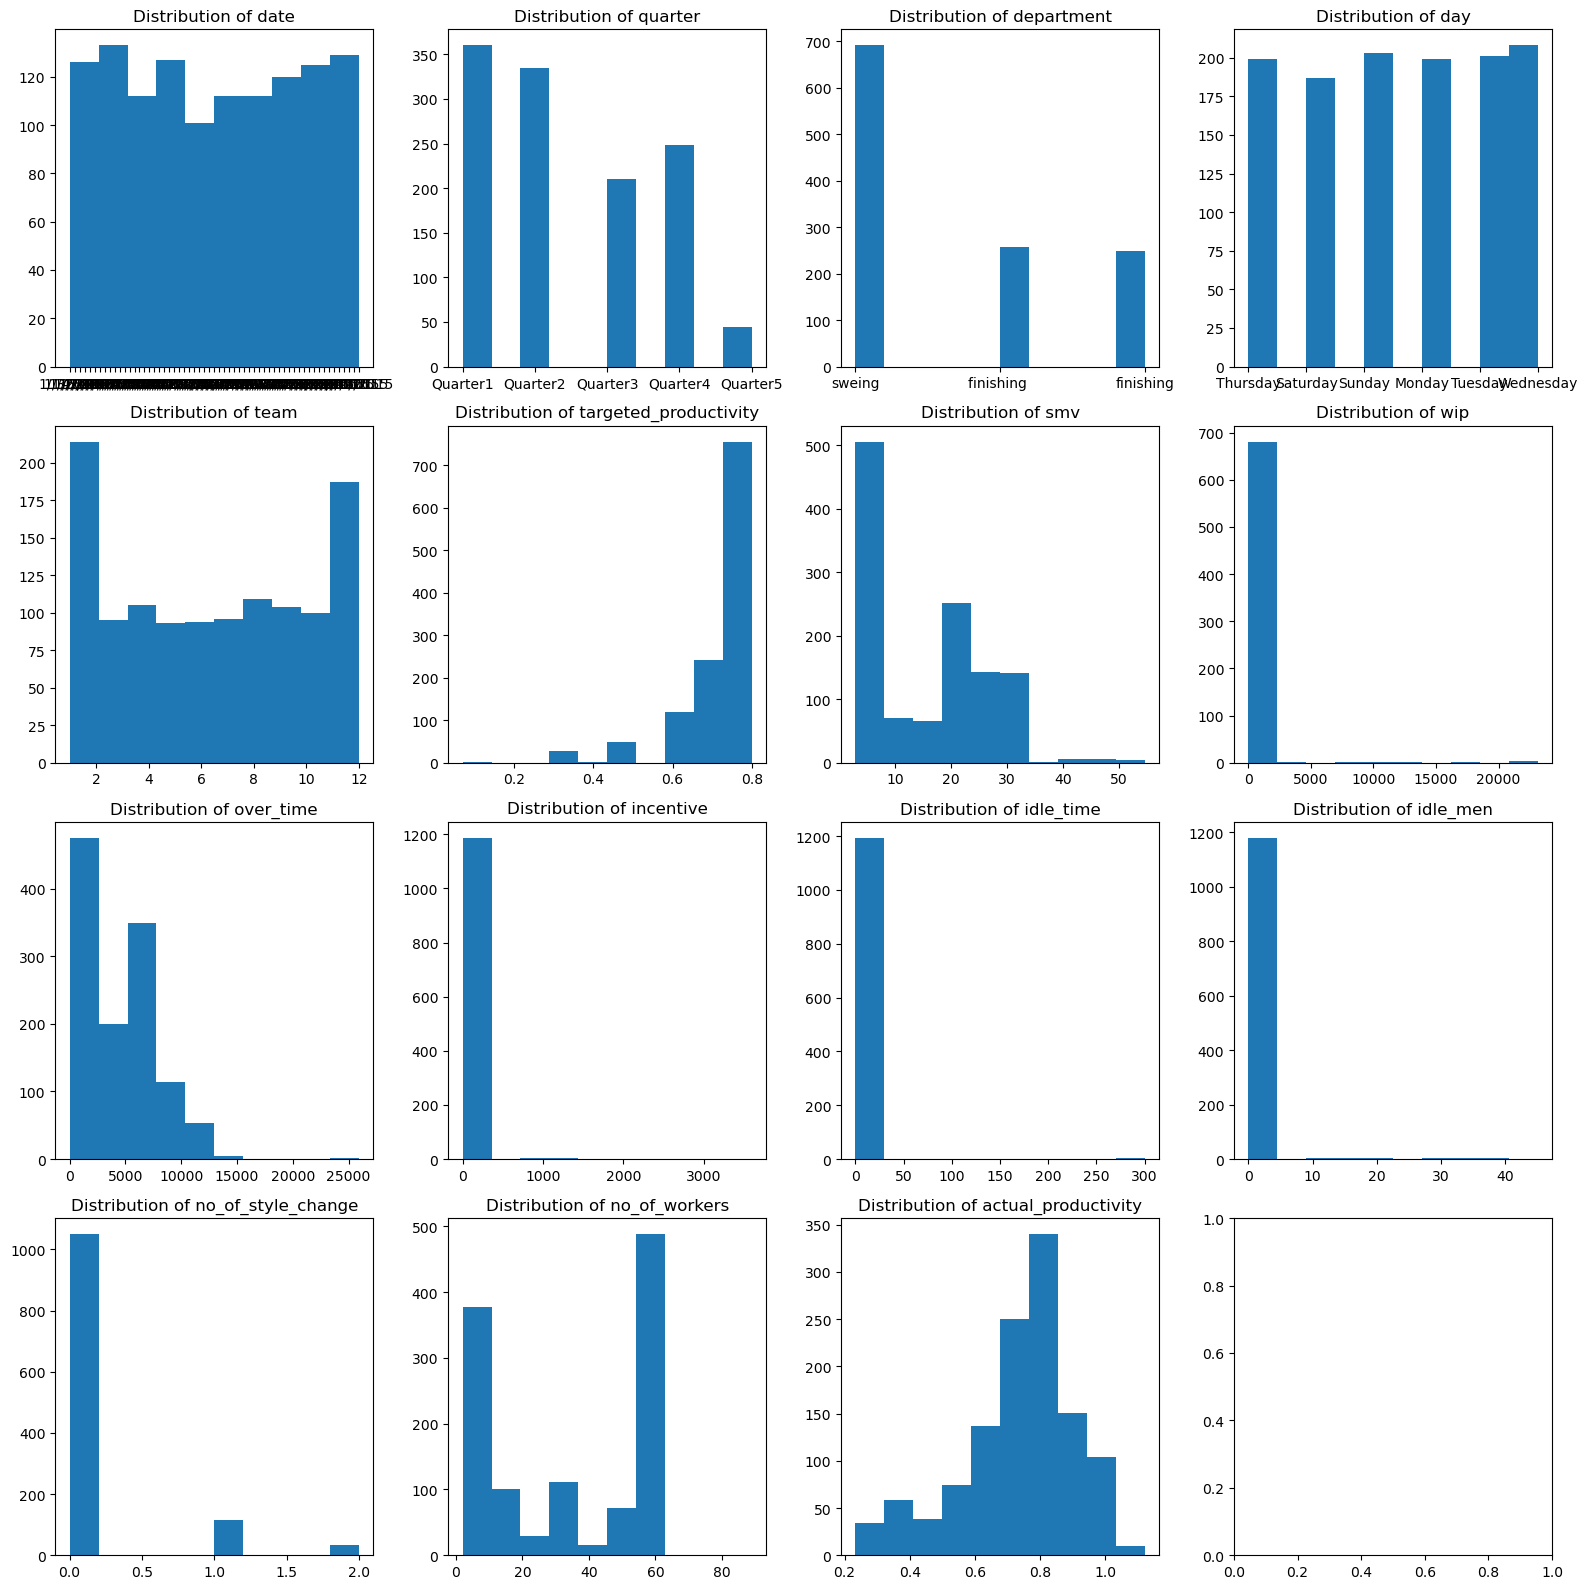

In [73]:
# Plot the distribution of each column.
num_plots = len(data.columns)
num_rows = 4
num_cols = (num_plots + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4*num_cols, 4*num_rows))

for i, col in enumerate(data.columns):
    row = i // num_cols
    column = i % num_cols

    if num_rows > 1:
        ax = axes[row, column]
    else:
        ax = axes[column]

    ax.hist(data[col])
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


The data set has 1197 rows and 15 columns. There are 506 null values in the "wip" column. Four of the columns are strings. The values in the data set make sense, and the minimum, maximum, and mean values are reasonable.
* The quarter column has 5 quarters instead of the usual 4.
* The department column has 2 finishing departments.
* The day column does not have Friday, which means that it is an off day.
* Most of the values in the wip, incentive, idle_men, and idle_time columns are low.

In [74]:
# Clean the department column.
data['department'] = data['department'].str.strip()

In [75]:
# Encode the categorical columns.
cat_cols = ['quarter', 'department', 'day', 'team']
def make_categories(df, col_list):
    for col in col_list:
        category=pd.Categorical(df[col])
        df[col]=category.codes
    return df
make_categories(data, cat_cols)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,3,7,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,0,3,0,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,1,3,10,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,1,3,5,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,0,5,9,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,1,0,5,7,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,1,0,5,6,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,1,0,5,8,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [76]:
# Print the correlation between the features and the target.
correlation = data.corr()
correlation['actual_productivity']

C:\Users\The user\AppData\Local\Temp\ipykernel_25668\3603390311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


quarter                 -0.051970
department              -0.087624
day                     -0.015690
team                    -0.148753
targeted_productivity    0.421594
smv                     -0.122089
wip                      0.131147
over_time               -0.054206
incentive                0.076538
idle_time               -0.080851
idle_men                -0.181734
no_of_style_change      -0.207366
no_of_workers           -0.057991
actual_productivity      1.000000
Name: actual_productivity, dtype: float64

<AxesSubplot:>

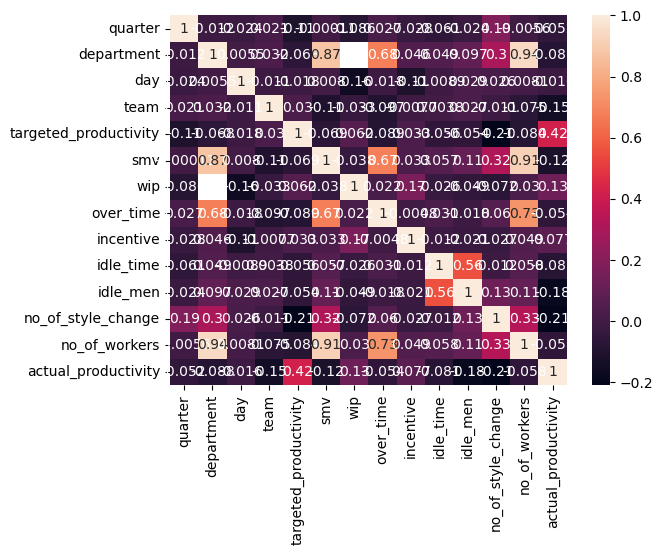

In [77]:
#Create heatmap
sns.heatmap(correlation, annot=True)

In [78]:
# Create the target column for a classification tree, using both productivity columns.
data['target']= data[['targeted_productivity','actual_productivity']].apply(lambda x: 1 if x["targeted_productivity"] <= x["actual_productivity"] else 0, axis=1)
data.drop(['targeted_productivity', 'actual_productivity'],axis=1, inplace=True)

Text(0.5, 0.98, 'Histogram of the quarter column grouped by the target.')

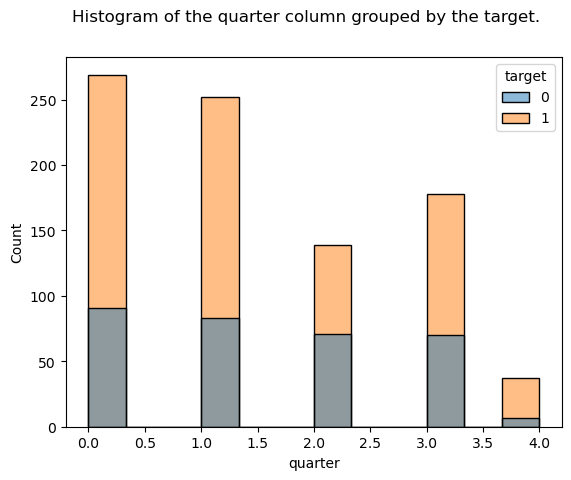

In [79]:
sns.histplot(data=data, x="quarter", hue='target')
plt.suptitle("Histogram of the quarter column grouped by the target.")

Text(0.5, 0.98, 'Histogram of the team column grouped by the target.')

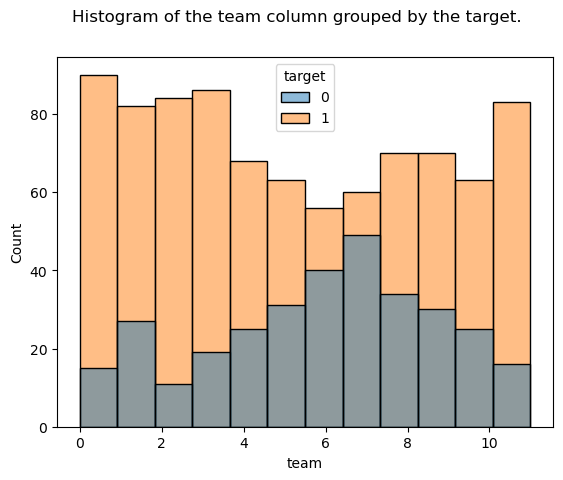

In [80]:
sns.histplot(data=data, x="team", hue='target')
plt.suptitle("Histogram of the team column grouped by the target.")

Text(0.5, 0.98, 'Histogram of the department column grouped by the target.')

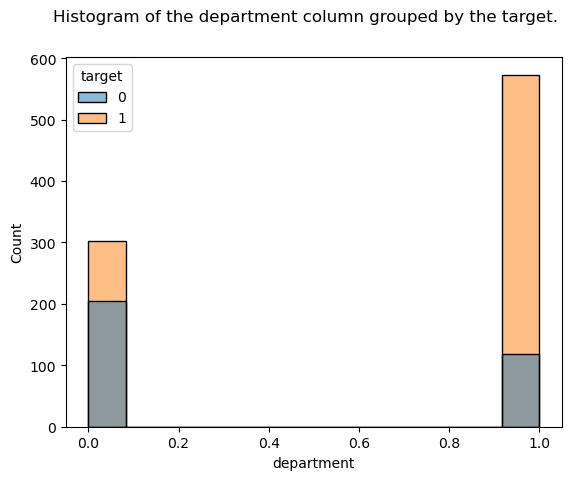

In [81]:
sns.histplot(data=data, x="department", hue='target')
plt.suptitle("Histogram of the department column grouped by the target.")

In [82]:
data.drop(['date', 'wip', 'day', 'idle_men', 'idle_time'], axis=1, inplace=True)

After analyzing the data, we can drop the following columns:



 * Date: This column does not provide any useful information for our analysis.
 * Wip: This column has a low correlation with the target and almost half of its values are null.
 * Day: This column has a low correlation with the target and its value counts are pretty balanced.
 * Idle_men and Idle_time: Most of the values are 0, so this is not helping the analysis.



We can keep the following columns:



 * No_of_style_changes: This column has a correlation with the target, so it is probably important.
 * Quarter: This column has a low correlation with the target, but when grouping the data by the target, we can see that some quarters are more productive than others.
 * Department: This column has a low correlation with the target, but when grouping the data by the target, we can see that the sewing department is more productive than the finishing department.
 * Team: This column is important because it can help us identify which teams are more productive.
 * No_of_workers: This column is important because we can see from the grouped data that when there are more workers, the productivity is higher.


In [83]:
# Split the data into features and labels.
X = data.drop('target', axis = 1)
y = data['target']

In [84]:
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=417)

In [85]:
#Normalize the data.
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [86]:
# Instantiate, fit and predict with a Decision Tree Classifier model.
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7055555555555556


[Text(0.5446428571428571, 0.9, 'incentive <= 0.006\ngini = 0.393\nsamples = 1017\nvalue = [273, 744]'),
 Text(0.2857142857142857, 0.7, 'smv <= 0.01\ngini = 0.493\nsamples = 524\nvalue = [230, 294]'),
 Text(0.14285714285714285, 0.5, 'no_of_workers <= 0.075\ngini = 0.405\nsamples = 92\nvalue = [66, 26]'),
 Text(0.07142857142857142, 0.3, 'quarter <= 0.125\ngini = 0.242\nsamples = 71\nvalue = [61, 10]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'team <= 0.545\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'smv <= 0.041\ngini = 0.471\nsamples = 432\nvalue = [164, 268]'),
 Text(0.35714285714285715, 0.3, 'no_of_workers <= 0.086\ngini = 0.408\nsamples = 312\nvalue = [89, 223]'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.5, 

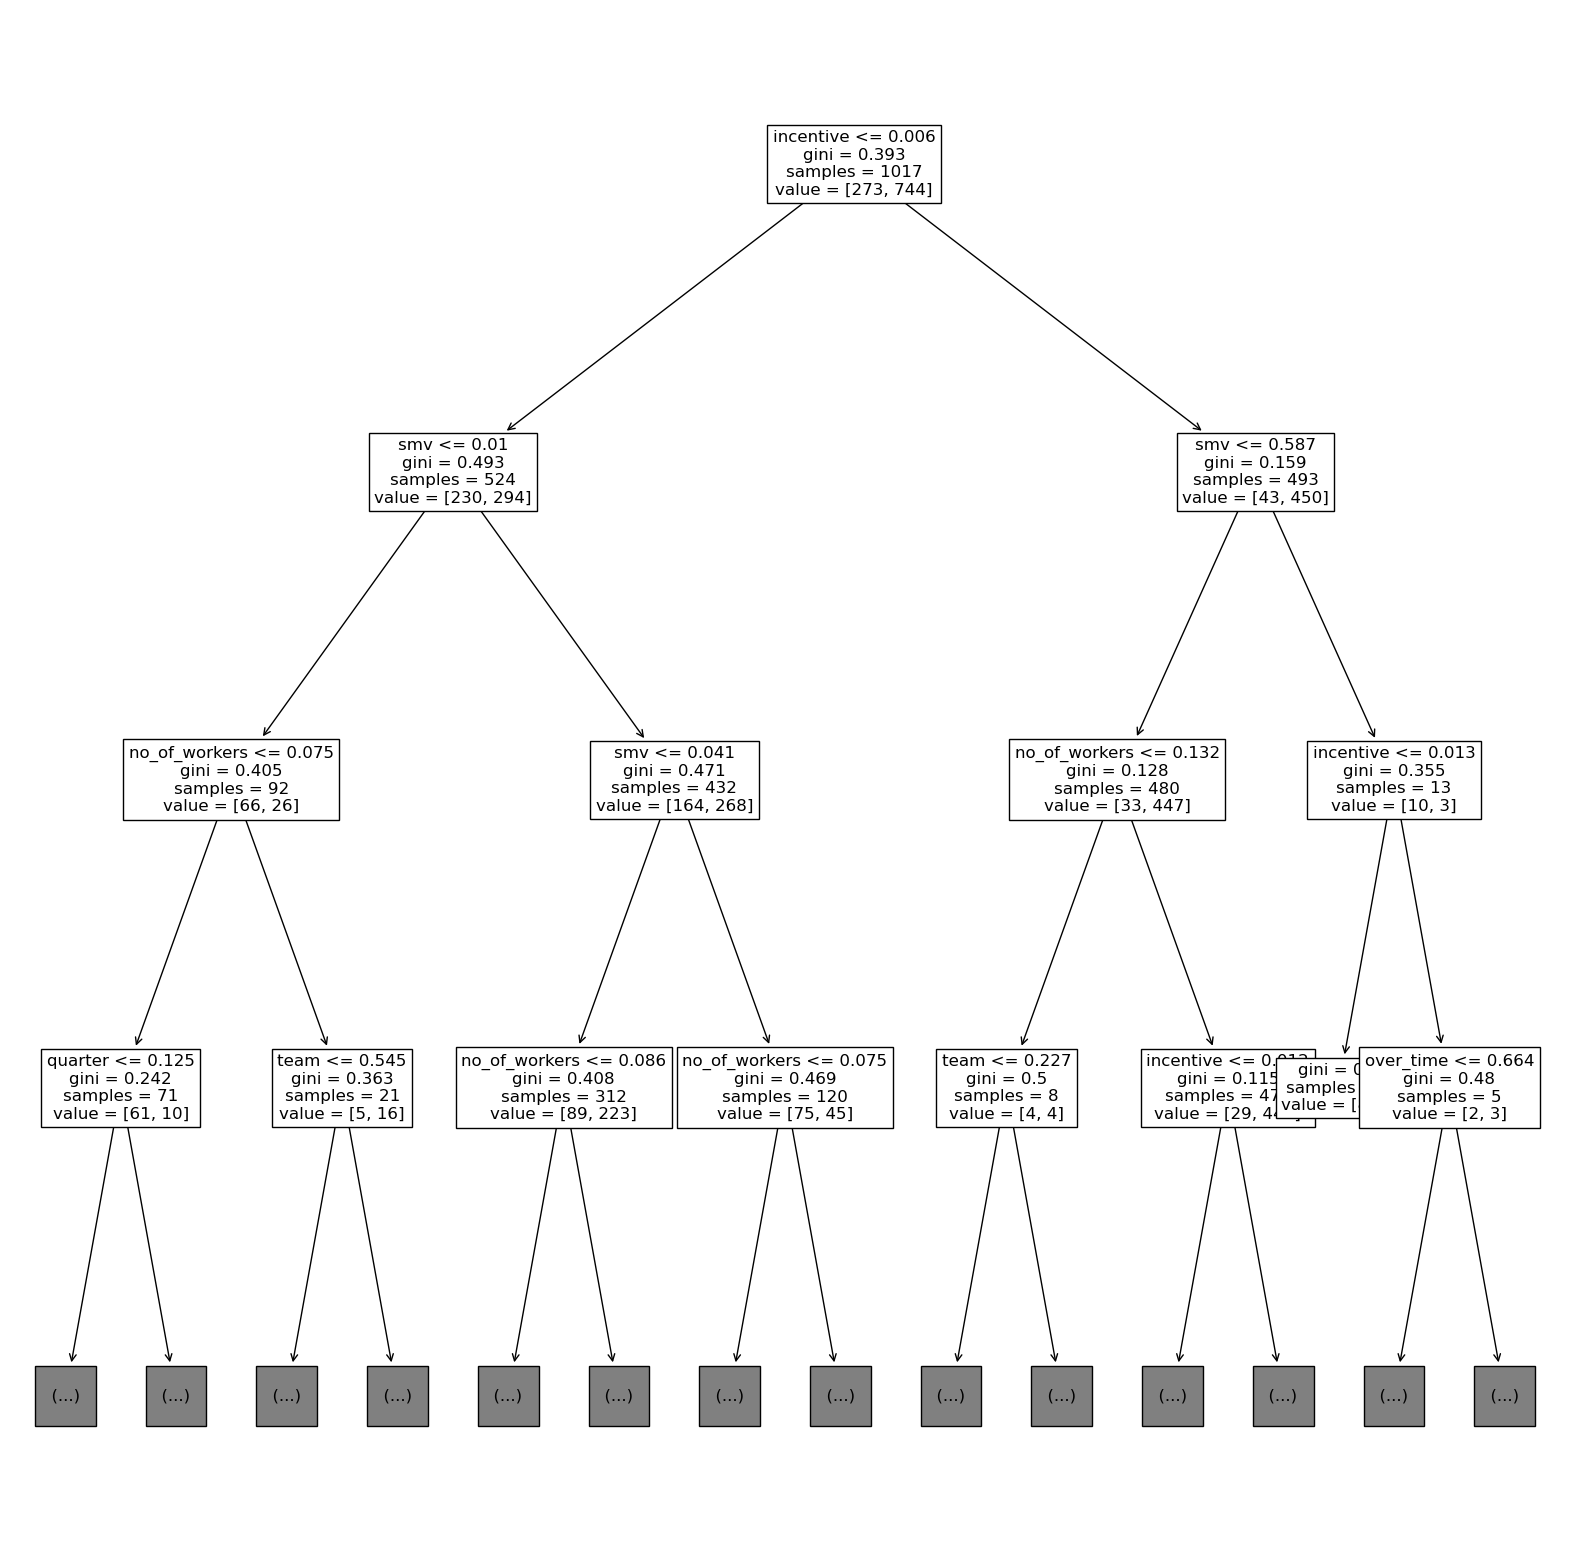

In [87]:
#Plot the decision tree.
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, feature_names=X_train.columns, max_depth=3, fontsize=12)

In [88]:
# return other evaluation metrics for this model.
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
recall=recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
print('true_positives:', TP, ', false_positives:', FP, ', false_negatives:', FN, ', true_negatives:', TN)
print('recall:', recall)
print('precision:', precision)

true_positives: 109 , false_positives: 31 , false_negatives: 22 , true_negatives: 18
recall: 0.8320610687022901
precision: 0.7785714285714286


Although our accuracy isn't all that high, our recall and precision seem to be doing pretty well, particularly the recall. We seem to be catching about 82% of the positives. 73% of our positive predictions are correct.

In [89]:
# Use different parameters to try to get the accuracy of the model higher;
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(accuracy)

0.7666666666666667


In [90]:
# Use different parameters to try to get the accuracy of the model higher;
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(accuracy)

0.7833333333333333


In [91]:
# Use different parameters to try to get the accuracy of the model higher;
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(accuracy)

0.7611111111111111


In [92]:
# Use different parameters to try to get the accuracy of the model higher;
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10,splitter='random')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(accuracy)

0.7888888888888889


* **criterion:** Using entropy instead of gini increased the accuracy of the model. This is because entropy is a more sensitive measure of impurity than gini, and it can help the model to better distinguish between the different classes.
* **max_depth:** Setting the maximum depth of the tree to 10 increased the model's score. This is because a deeper tree can learn more complex relationships between the features and the target variable. However, a deeper tree can also be more likely to overfit the training data, so it is important to experiment with different values of max_depth to find the best combination for the specific dataset.
* **min_samples_split:** Increasing the minimum number of samples required to split an internal node decreased the model's score. This is because a smaller min_samples_split can lead to overfitting, as the model will be more likely to split on small groups of samples that are not representative of the overall dataset.
* **splitter:** Using the random splitter increased the model's score. This is because the random splitter can help to prevent overfitting, as it does not always choose the split that maximizes the information gain.

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(rf_pred, y_test)
print(rf_accuracy)

0.7722222222222223


In [94]:
# Try to improve model performance by tuning hyperparameters.
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(rf_pred, y_test)
print(rf_accuracy)

0.7444444444444445


In [95]:
# Try to improve model performance by tuning hyperparameters.
rf = RandomForestClassifier(n_estimators=30, criterion='entropy')
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(rf_pred, y_test)
print(rf_accuracy)

0.7611111111111111


In [96]:
# Try to improve model performance by tuning hyperparameters.
rf = RandomForestClassifier(n_estimators=30, max_depth=10)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(rf_pred, y_test)
print(rf_accuracy)

0.7722222222222223


In the RandomForestClassifier model, decreasing the number of estimators from 100 to 30 increased the score. This is because a smaller number of trees can help to reduce overfitting, as the model will be less likely to learn the specific details of the training data and more likely to learn the general trends.
The criterion and max_depth parameters had a negative effect on the score. Using the entropy criterion instead of the Gini impurity criterion decreased the score because the entropy criterion is more sensitive to class imbalance, and the dataset used in this experiment was imbalanced. Increasing the maximum depth from None to 10 decreased the score because a deeper tree can learn more complex relationships between the features and the target variable, but it can also be more likely to overfit the training data.

The Decision Tree Model did better than the random forest model.
Here are a few reasons for this:
* **Simpler:** Decision trees are simpler models than random forests. This means that they are less likely to overfit the training data and more likely to generalize well to new data.
* **Interpretable:** Decision trees are more interpretable than random forests. This means that it is easier to understand how a decision tree makes predictions, which can be helpful for debugging and understanding the model.

The models used in this project are like tools that help predict how productive employees will be. One model is a decision tree, which uses a flowchart-like structure to make predictions based on different employee characteristics. The other model is a random forest, which combines multiple decision trees to make more accurate predictions. The models have parameters that affect their performance, like how they measure employee characteristics and how deep the tree goes. To understand the models, we look at metrics like recall and precision, which tell us how well they predict productivity. Overall, the models help us understand what factors contribute to employee productivity in a simple way.

If I had more time, I would gather more data, try different approaches, and analyze the importance of different factors. I would also evaluate the models using different measurements to make them better at predicting employee productivity.